In [1]:
import pandas as pd
import numpy as np
from pandas import Series

In [2]:
# Dataset
ddi_dbank_df = pd.read_csv('https://raw.githubusercontent.com/dbmi-pitt/public-PDDI-analysis/master/PDDI-Datasets/DrugBank/drugbank5-interactions-NLM-R01-drugs.tsv', sep='\t', header=0, names=['drug1','db_no1', 'drug2', 'db_no2', 'interaction', 'general_syntax'])

In [3]:
ddi_dbank_df.head(10)

,drug1,db_no1,drug2,db_no2,interaction,general_syntax
0,Pravastatin,DB00175,Acebutolol,DB01193,The serum concentration of Acebutolol can be i...,the serum concentration of drug2 can be increa...
1,Pravastatin,DB00175,Acenocoumarol,DB01418,Pravastatin may increase the anticoagulant act...,drug1 may increase the anticoagulant activitie...
2,Pravastatin,DB00175,Acetaminophen,DB00316,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...
3,Pravastatin,DB00175,Acetylsalicylic acid,DB00945,The serum concentration of Acetylsalicylic aci...,the serum concentration of drug2 can be increa...
4,Pravastatin,DB00175,Acipimox,DB09055,Acipimox may increase the myopathic rhabdomyol...,drug2 may increase the myopathic rhabdomyolysi...
5,Pravastatin,DB00175,Afatinib,DB08916,The serum concentration of Afatinib can be inc...,the serum concentration of drug2 can be increa...
6,Pravastatin,DB00175,Albendazole,DB00518,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...
7,Pravastatin,DB00175,Aldosterone,DB04630,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be decrea...
8,Pravastatin,DB00175,Alectinib,DB11363,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...
9,Pravastatin,DB00175,Alfentanil,DB00802,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...


In [4]:
all_drugs = pd.read_csv('../Data/all_drugs2.csv',index_col = False)

In [5]:
all_drugs.head(2)
# drugbank_id

,drugbank_id,Name,smiles
0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...


In [6]:
all_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10630 entries, 0 to 10629
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugbank_id  10630 non-null  object
 1   Name         10630 non-null  object
 2   smiles       10630 non-null  object
dtypes: object(3)
memory usage: 249.3+ KB


In [7]:
ddi_dbank_df['general_syntax'].value_counts().head(10)

the risk or severity of adverse effects can be increased when drug1 is combined with drug2.    7398
the risk or severity of adverse effects can be increased when drug2 is combined with drug1.    6994
the serum concentration of drug1 can be increased when it is combined with drug2.              4634
the metabolism of drug2 can be decreased when combined with drug1.                             3978
the serum concentration of drug2 can be increased when it is combined with drug1.              3699
the metabolism of drug1 can be decreased when combined with drug2.                             2698
the serum concentration of drug1 can be decreased when it is combined with drug2.              1392
drug1 may increase the qtc-prolonging activities of drug2.                                     1251
drug2 may increase the qtc-prolonging activities of drug1.                                     1251
drug2 may increase the serotonergic activities of drug1.                                       1014


In [8]:
import seaborn as sns

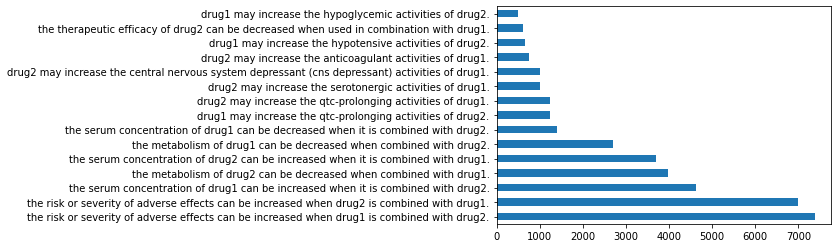

In [9]:
ax = ddi_dbank_df['general_syntax'].value_counts()[:15].plot(kind='barh')

In [10]:
li = ['the risk or severity of adverse effects can be increased when drug1 is combined with drug2.',
'the risk or severity of adverse effects can be increased when drug2 is combined with drug1.',
'the serum concentration of drug1 can be increased when it is combined with drug2.',
'the metabolism of drug2 can be decreased when combined with drug1.',
'the serum concentration of drug2 can be increased when it is combined with drug1.',
'the metabolism of drug1 can be decreased when combined with drug2.',
'drug1 may increase the qtc-prolonging activities of drug2.',
'drug2 may increase the qtc-prolonging activities of drug1.'
]

In [11]:
# new_df = ddi_dbank_df.drop(ddi_dbank_df[ddi_dbank_df.general_syntax.isin(li)].index.tolist())
new_df = ddi_dbank_df[ddi_dbank_df['general_syntax'].isin(li)]

In [12]:
new_df['general_syntax'].unique()

array(['the serum concentration of drug2 can be increased when it is combined with drug1.',
       'the serum concentration of drug1 can be increased when it is combined with drug2.',
       'the metabolism of drug1 can be decreased when combined with drug2.',
       'the risk or severity of adverse effects can be increased when drug2 is combined with drug1.',
       'the risk or severity of adverse effects can be increased when drug1 is combined with drug2.',
       'the metabolism of drug2 can be decreased when combined with drug1.',
       'drug2 may increase the qtc-prolonging activities of drug1.',
       'drug1 may increase the qtc-prolonging activities of drug2.'],
      dtype=object)

In [13]:
new_df

,drug1,db_no1,drug2,db_no2,interaction,general_syntax
0,Pravastatin,DB00175,Acebutolol,DB01193,The serum concentration of Acebutolol can be i...,the serum concentration of drug2 can be increa...
2,Pravastatin,DB00175,Acetaminophen,DB00316,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...
3,Pravastatin,DB00175,Acetylsalicylic acid,DB00945,The serum concentration of Acetylsalicylic aci...,the serum concentration of drug2 can be increa...
5,Pravastatin,DB00175,Afatinib,DB08916,The serum concentration of Afatinib can be inc...,the serum concentration of drug2 can be increa...
6,Pravastatin,DB00175,Albendazole,DB00518,The serum concentration of Pravastatin can be ...,the serum concentration of drug1 can be increa...
...,...,...,...,...,...,...
42173,Vortioxetine,DB09068,Zolmitriptan,DB00315,The risk or severity of adverse effects can be...,the risk or severity of adverse effects can be...
42175,Vortioxetine,DB09068,Zonisamide,DB00909,The risk or severity of adverse effects can be...,the risk or severity of adverse effects can be...
42176,Vortioxetine,DB09068,Zopiclone,DB01198,The risk or severity of adverse effects can be...,the risk or severity of adverse effects can be...
42177,Vortioxetine,DB09068,Zotepine,DB09225,The risk or severity of adverse effects can be...,the risk or severity of adverse effects can be...


In [14]:
new_df.drop('interaction',inplace=True,axis=1)

C:\Users\RAZAK\AppData\Local\Temp\ipykernel_18412\2613209728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('interaction',inplace=True,axis=1)


In [15]:
new_df.head()

,drug1,db_no1,drug2,db_no2,general_syntax
0,Pravastatin,DB00175,Acebutolol,DB01193,the serum concentration of drug2 can be increa...
2,Pravastatin,DB00175,Acetaminophen,DB00316,the serum concentration of drug1 can be increa...
3,Pravastatin,DB00175,Acetylsalicylic acid,DB00945,the serum concentration of drug2 can be increa...
5,Pravastatin,DB00175,Afatinib,DB08916,the serum concentration of drug2 can be increa...
6,Pravastatin,DB00175,Albendazole,DB00518,the serum concentration of drug1 can be increa...


In [16]:
new_df['smiles1'] = None
new_df['smiles2'] = None

C:\Users\RAZAK\AppData\Local\Temp\ipykernel_18412\3900669594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['smiles1'] = None
C:\Users\RAZAK\AppData\Local\Temp\ipykernel_18412\3900669594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['smiles2'] = None


In [17]:
new_df.head()

,drug1,db_no1,drug2,db_no2,general_syntax,smiles1,smiles2
0,Pravastatin,DB00175,Acebutolol,DB01193,the serum concentration of drug2 can be increa...,None,None
2,Pravastatin,DB00175,Acetaminophen,DB00316,the serum concentration of drug1 can be increa...,None,None
3,Pravastatin,DB00175,Acetylsalicylic acid,DB00945,the serum concentration of drug2 can be increa...,None,None
5,Pravastatin,DB00175,Afatinib,DB08916,the serum concentration of drug2 can be increa...,None,None
6,Pravastatin,DB00175,Albendazole,DB00518,the serum concentration of drug1 can be increa...,None,None


In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
'''DB00286'''
smilesx = (all_drugs[all_drugs['drugbank_id'] == 'DB00286']['smiles']).to_string(index=False)
if(smilesx != 'Series([], )'):
    print(smilesx)

In [20]:
drop_list = []

In [21]:
for index, row in new_df.iterrows():
    db_no1 = row['db_no1']
    db_no2 = row['db_no2']

    smiles1 = (all_drugs[all_drugs['drugbank_id'] == db_no1]['smiles']).to_string(index=False)
    smiles2 = (all_drugs[all_drugs['drugbank_id'] == db_no2]['smiles']).to_string(index=False)
    # print((smiles1))
    if(smiles1 == 'Series([], )' or smiles2 == 'Series([], )'):
        drop_list.append(index)
        continue
    row['smiles1'] = smiles1
    row['smiles2'] = smiles2    
   

In [22]:
new_df.head(100)

,drug1,db_no1,drug2,db_no2,general_syntax,smiles1,smiles2
0,Pravastatin,DB00175,Acebutolol,DB01193,the serum concentration of drug2 can be increased when it is combined with drug1.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CCCC(=O)NC1=CC(C(C)=O)=C(OCC(O)CNC(C)C)C=C1
2,Pravastatin,DB00175,Acetaminophen,DB00316,the serum concentration of drug1 can be increased when it is combined with drug2.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CC(=O)NC1=CC=C(O)C=C1
3,Pravastatin,DB00175,Acetylsalicylic acid,DB00945,the serum concentration of drug2 can be increased when it is combined with drug1.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CC(=O)OC1=CC=CC=C1C(O)=O
5,Pravastatin,DB00175,Afatinib,DB08916,the serum concentration of drug2 can be increased when it is combined with drug1.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CN(C)C\C=C\C(=O)NC1=C(O[C@H]2CCOC2)C=C2N=CN=C(NC3=CC(Cl)=C(F)C=C3)C2=C1
6,Pravastatin,DB00175,Albendazole,DB00518,the serum concentration of drug1 can be increased when it is combined with drug2.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CCCSC1=CC2=C(C=C1)N=C(NC(=O)OC)N2
...,...,...,...,...,...,...,...
118,Pravastatin,DB00175,Diclofenac,DB00586,the serum concentration of drug1 can be increased when it is combined with drug2.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,OC(=O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl
120,Pravastatin,DB00175,Diethylstilbestrol,DB00255,the serum concentration of drug2 can be increased when it is combined with drug1.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,CC\C(=C(\CC)C1=CC=C(O)C=C1)C1=CC=C(O)C=C1
121,Pravastatin,DB00175,Digitoxin,DB01396,the serum concentration of drug2 can be increased when it is combined with drug1.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,[H][C@@]1(CC[C@]2(O)[C@]3([H])CC[C@]4([H])C[C@H](CC[C@]4(C)[C@@]3([H])CC[C@]12C)O[C@H]1C[C@H](O)[C@H](O[C@H]2C[C@H](O)[C@H](O[C@H]3C[C@H](O)[C@H](O)[C@@H](C)O3)[C@@H](C)O2)[C@@H](C)O1)C1=CC(=O)OC1
123,Pravastatin,DB00175,Dihydroergotamine,DB00320,the metabolism of drug1 can be decreased when combined with drug2.,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2CC[C@@H](O)C[C@@H](O)CC(O)=O)OC(=O)[C@@H](C)CC,[H][C@@]12CCCN1C(=O)[C@H](CC1=CC=CC=C1)N1C(=O)[C@](C)(NC(=O)[C@H]3CN(C)[C@]4([H])CC5=CNC6=CC=CC(=C56)[C@@]4([H])C3)O[C@@]21O


In [23]:
new_df.drop(index=drop_list, inplace = True)

C:\Users\RAZAK\AppData\Local\Temp\ipykernel_18412\741722633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(index=drop_list, inplace = True)


In [25]:
new_df.to_csv('processed_df.csv')